# Unsupervised Lab Session

## Learning outcomes:
- Exploratory data analysis and data preparation for model building.
- PCA for dimensionality reduction.
- K-means and Agglomerative Clustering

## Problem Statement
Based on the given marketing campigan dataset, segment the similar customers into suitable clusters. Analyze the clusters and provide your insights to help the organization promote their business.

## Context:
- Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.
- Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## About dataset
- Source: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?datasetId=1546318&sortBy=voteCount

### Attribute Information:
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

### 1. Import required libraries

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score,auc,roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from datetime import datetime
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

### 2. Load the CSV file (i.e marketing.csv) and display the first 5 rows of the dataframe. Check the shape and info of the dataset.

In [ ]:
df = pd.read_csv('marketing.csv',encoding='unicode_escape')
print(df.head())

In [5]:
def basic_info(df):
    '''checking basic information & shape about the dataframe'''
    temp=df.copy(deep=True)
    print("Shape of the dataset",df.shape)
    print("*"*30)
    print(df.info())
    
basic_info(df)

Shape of the dataset (2240, 27)
******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240

### 3. Check the percentage of missing values? If there is presence of missing values, treat them accordingly.

In [6]:
def check_missing_values(df):
    '''Function to check the missing data percentage'''
    print("percentage of missing data of dataframe \n",df.isnull().sum()/len(df)*100)
    
check_missing_values(df)

percentage of missing data of dataframe 
 ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Response               0.000000
dtype: float64


### 4. Check if there are any duplicate records in the dataset? If any drop them.

In [7]:
def check_duplicate(df):
    duplicate=df[df.duplicated()]
    return duplicate

duplicate=check_duplicate(df)
duplicate

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response


### 5. Drop the columns which you think redundant for the analysis 

In [8]:
''' Display the original DataFrame '''
print("Original DataFrame:")
print(df)

Original DataFrame:
         ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumCatalogPurchases  \
0            0    4/9/2012       58     

In [9]:
''' List the column names that you consider redundant '''
redundant_columns = ['ID', 'Dt_Customer']

''' Drop the redundant columns'''
df = df.drop(redundant_columns, axis=1)

'''Display the updated DataFrame '''
print("\nDataFrame after dropping redundant columns:")
print(df)


DataFrame after dropping redundant columns:
      Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0           1957  Graduation         Single  58138.0        0         0   
1           1954  Graduation         Single  46344.0        1         1   
2           1965  Graduation       Together  71613.0        0         0   
3           1984  Graduation       Together  26646.0        1         0   
4           1981         PhD        Married  58293.0        1         0   
...          ...         ...            ...      ...      ...       ...   
2235        1967  Graduation        Married  61223.0        0         1   
2236        1946         PhD       Together  64014.0        2         1   
2237        1981  Graduation       Divorced  56981.0        0         0   
2238        1956      Master       Together  69245.0        0         1   
2239        1954         PhD        Married  52869.0        1         1   

      Recency  MntWines  MntFruits  MntMeatProducts  .

### 6. Check the unique categories in the column 'Marital_Status'
- i) Group categories 'Married', 'Together' as 'relationship'
- ii) Group categories 'Divorced', 'Widow', 'Alone', 'YOLO', and 'Absurd' as 'Single'.

In [10]:
''' i) Group categories 'Married', 'Together' as 'relationship'  '''
''' Display the original DataFrame '''
print("Original DataFrame:")
print(df)

# Define the mapping to group categories
category_mapping = {
    'Married': 'relationship',
    'Together': 'relationship',
}

# Group the categories using the mapping
df['Marital_Status'] = df['Marital_Status'].replace(category_mapping)

# Display the updated DataFrame
print("\nDataFrame after grouping categories:")
print(df)

Original DataFrame:
      Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0           1957  Graduation         Single  58138.0        0         0   
1           1954  Graduation         Single  46344.0        1         1   
2           1965  Graduation       Together  71613.0        0         0   
3           1984  Graduation       Together  26646.0        1         0   
4           1981         PhD        Married  58293.0        1         0   
...          ...         ...            ...      ...      ...       ...   
2235        1967  Graduation        Married  61223.0        0         1   
2236        1946         PhD       Together  64014.0        2         1   
2237        1981  Graduation       Divorced  56981.0        0         0   
2238        1956      Master       Together  69245.0        0         1   
2239        1954         PhD        Married  52869.0        1         1   

      Recency  MntWines  MntFruits  MntMeatProducts  ...  NumCatalogPurchases  

In [11]:
#ii) Group categories 'Divorced', 'Widow', 'Alone', 'YOLO', and 'Absurd' as 'Single'
''' Display the original DataFrame '''
print("Original DataFrame:")
print(df)

# Define the mapping to group categories
category_mapping = {
    'Divorced': 'Single',
    'Widow': 'Single',
    'Alone': 'Single',
    'YOLO': 'Single',
    
}

# Group the categories using the mapping
df['Marital_Status'] = df['Marital_Status'].replace(category_mapping)

# Display the updated DataFrame
print("\nDataFrame after grouping categories:")
print(df)


Original DataFrame:
      Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0           1957  Graduation         Single  58138.0        0         0   
1           1954  Graduation         Single  46344.0        1         1   
2           1965  Graduation   relationship  71613.0        0         0   
3           1984  Graduation   relationship  26646.0        1         0   
4           1981         PhD   relationship  58293.0        1         0   
...          ...         ...            ...      ...      ...       ...   
2235        1967  Graduation   relationship  61223.0        0         1   
2236        1946         PhD   relationship  64014.0        2         1   
2237        1981  Graduation       Divorced  56981.0        0         0   
2238        1956      Master   relationship  69245.0        0         1   
2239        1954         PhD   relationship  52869.0        1         1   

      Recency  MntWines  MntFruits  MntMeatProducts  ...  NumCatalogPurchases  

### 7. Group the columns 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', and 'MntGoldProds' as 'Total_Expenses'

In [12]:
# Calculate total expenses by grouping columns
df['Total_Expenses'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                           'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Display the updated DataFrame
print(df)

      Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0           1957  Graduation         Single  58138.0        0         0   
1           1954  Graduation         Single  46344.0        1         1   
2           1965  Graduation   relationship  71613.0        0         0   
3           1984  Graduation   relationship  26646.0        1         0   
4           1981         PhD   relationship  58293.0        1         0   
...          ...         ...            ...      ...      ...       ...   
2235        1967  Graduation   relationship  61223.0        0         1   
2236        1946         PhD   relationship  64014.0        2         1   
2237        1981  Graduation         Single  56981.0        0         0   
2238        1956      Master   relationship  69245.0        0         1   
2239        1954         PhD   relationship  52869.0        1         1   

      Recency  MntWines  MntFruits  MntMeatProducts  ...  NumStorePurchases  \
0          58       

### 8. Group the columns 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', and 'NumDealsPurchases' as 'Num_Total_Purchases'

In [13]:
# Calculate total expenses by grouping columns
df['Num_Total_Purchases'] = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases','NumDealsPurchases']].sum(axis=1)

# Display the updated DataFrame
print(df)

      Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0           1957  Graduation         Single  58138.0        0         0   
1           1954  Graduation         Single  46344.0        1         1   
2           1965  Graduation   relationship  71613.0        0         0   
3           1984  Graduation   relationship  26646.0        1         0   
4           1981         PhD   relationship  58293.0        1         0   
...          ...         ...            ...      ...      ...       ...   
2235        1967  Graduation   relationship  61223.0        0         1   
2236        1946         PhD   relationship  64014.0        2         1   
2237        1981  Graduation         Single  56981.0        0         0   
2238        1956      Master   relationship  69245.0        0         1   
2239        1954         PhD   relationship  52869.0        1         1   

      Recency  MntWines  MntFruits  MntMeatProducts  ...  NumWebVisitsMonth  \
0          58       

### 9. Group the columns 'Kidhome' and 'Teenhome' as 'Kids'

In [14]:
# Calculate total expenses by grouping columns
df['Kids'] = df[['Kidhome', 'Teenhome']].sum(axis=1)

# Display the updated DataFrame
print(df)

      Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0           1957  Graduation         Single  58138.0        0         0   
1           1954  Graduation         Single  46344.0        1         1   
2           1965  Graduation   relationship  71613.0        0         0   
3           1984  Graduation   relationship  26646.0        1         0   
4           1981         PhD   relationship  58293.0        1         0   
...          ...         ...            ...      ...      ...       ...   
2235        1967  Graduation   relationship  61223.0        0         1   
2236        1946         PhD   relationship  64014.0        2         1   
2237        1981  Graduation         Single  56981.0        0         0   
2238        1956      Master   relationship  69245.0        0         1   
2239        1954         PhD   relationship  52869.0        1         1   

      Recency  MntWines  MntFruits  MntMeatProducts  ...  AcceptedCmp3  \
0          58       635  

### 10. Group columns 'AcceptedCmp1 , 2 , 3 , 4, 5' and 'Response' as 'TotalAcceptedCmp'

In [15]:
# Calculate total expenses by grouping columns
df['TotalAcceptedCmp'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3','AcceptedCmp4', 'AcceptedCmp5', 'Response' ]].sum(axis=1)

# Display the updated DataFrame
print(df)

      Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0           1957  Graduation         Single  58138.0        0         0   
1           1954  Graduation         Single  46344.0        1         1   
2           1965  Graduation   relationship  71613.0        0         0   
3           1984  Graduation   relationship  26646.0        1         0   
4           1981         PhD   relationship  58293.0        1         0   
...          ...         ...            ...      ...      ...       ...   
2235        1967  Graduation   relationship  61223.0        0         1   
2236        1946         PhD   relationship  64014.0        2         1   
2237        1981  Graduation         Single  56981.0        0         0   
2238        1956      Master   relationship  69245.0        0         1   
2239        1954         PhD   relationship  52869.0        1         1   

      Recency  MntWines  MntFruits  MntMeatProducts  ...  AcceptedCmp4  \
0          58       635  

### 11. Drop those columns which we have used above for obtaining new features

In [16]:
# Drop the individual columns
df.drop(['Total_Expenses', 'Num_Total_Purchases', 'Kids', 'TotalAcceptedCmp'], axis=1, inplace=True)

# Display the updated DataFrame
print(df)

      Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0           1957  Graduation         Single  58138.0        0         0   
1           1954  Graduation         Single  46344.0        1         1   
2           1965  Graduation   relationship  71613.0        0         0   
3           1984  Graduation   relationship  26646.0        1         0   
4           1981         PhD   relationship  58293.0        1         0   
...          ...         ...            ...      ...      ...       ...   
2235        1967  Graduation   relationship  61223.0        0         1   
2236        1946         PhD   relationship  64014.0        2         1   
2237        1981  Graduation         Single  56981.0        0         0   
2238        1956      Master   relationship  69245.0        0         1   
2239        1954         PhD   relationship  52869.0        1         1   

      Recency  MntWines  MntFruits  MntMeatProducts  ...  NumCatalogPurchases  \
0          58     

### 12. Extract 'age' using the column 'Year_Birth' and then drop the column 'Year_birth'

In [17]:
current_year = datetime.now().year
df['Age'] = current_year - df['Year_Birth']
df.drop('Year_Birth', axis=1, inplace=True)
print(df)

       Education Marital_Status   Income  Kidhome  Teenhome  Recency  \
0     Graduation         Single  58138.0        0         0       58   
1     Graduation         Single  46344.0        1         1       38   
2     Graduation   relationship  71613.0        0         0       26   
3     Graduation   relationship  26646.0        1         0       26   
4            PhD   relationship  58293.0        1         0       94   
...          ...            ...      ...      ...       ...      ...   
2235  Graduation   relationship  61223.0        0         1       46   
2236         PhD   relationship  64014.0        2         1       56   
2237  Graduation         Single  56981.0        0         0       91   
2238      Master   relationship  69245.0        0         1        8   
2239         PhD   relationship  52869.0        1         1       40   

      MntWines  MntFruits  MntMeatProducts  MntFishProducts  ...  \
0          635         88              546              172  ...   

### 13. Encode the categorical variables in the dataset

In [18]:
# Perform one-hot encoding
encoded_df = pd.get_dummies(df['Education'])

# Concatenate encoded columns to the original DataFrame
df_encoded = pd.concat([df, encoded_df], axis=1)

# Drop the original categorical column
df_encoded.drop('Education', axis=1, inplace=True)

# Display the updated DataFrame
print(df_encoded)

     Marital_Status   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0            Single  58138.0        0         0       58       635         88   
1            Single  46344.0        1         1       38        11          1   
2      relationship  71613.0        0         0       26       426         49   
3      relationship  26646.0        1         0       26        11          4   
4      relationship  58293.0        1         0       94       173         43   
...             ...      ...      ...       ...      ...       ...        ...   
2235   relationship  61223.0        0         1       46       709         43   
2236   relationship  64014.0        2         1       56       406          0   
2237         Single  56981.0        0         0       91       908         48   
2238   relationship  69245.0        0         1        8       428         30   
2239   relationship  52869.0        1         1       40        84          3   

      MntMeatProducts  MntF

### 14. Standardize the columns, so that values are in a particular range

In [19]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Specify the columns to standardize
columns_to_scale = ['Kidhome', 'Teenhome']

# Standardize the specified columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Display the standardized DataFrame
print(df)

       Education Marital_Status   Income  Kidhome  Teenhome  Recency  \
0     Graduation         Single  58138.0      0.0       0.0       58   
1     Graduation         Single  46344.0      0.5       0.5       38   
2     Graduation   relationship  71613.0      0.0       0.0       26   
3     Graduation   relationship  26646.0      0.5       0.0       26   
4            PhD   relationship  58293.0      0.5       0.0       94   
...          ...            ...      ...      ...       ...      ...   
2235  Graduation   relationship  61223.0      0.0       0.5       46   
2236         PhD   relationship  64014.0      1.0       0.5       56   
2237  Graduation         Single  56981.0      0.0       0.0       91   
2238      Master   relationship  69245.0      0.0       0.5        8   
2239         PhD   relationship  52869.0      0.5       0.5       40   

      MntWines  MntFruits  MntMeatProducts  MntFishProducts  ...  \
0          635         88              546              172  ...   

# 15. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same.

In [26]:

# Initialize the PCA object
pca = PCA()

# Fit the PCA model on the data
pca.fit(df)

# Calculate the cumulative explained variance ratio
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Determine the number of principal components needed
num_components = np.argmax(explained_variance_ratio >= 0.9) + 1  # or 0.95 for 95% explained variance



### 16. Apply K-means clustering and segment the data (Use PCA transformed data for clustering)

In [40]:
# Extract the features for clustering
features = df[['Kidhome', 'Teenhome', 'Year_Birth']]  # Add the relevant feature columns

# Apply K-means clustering
n_clusters = 3  # Set the desired number of clusters
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(features)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Add the cluster labels to the DataFrame
df['Cluster'] = cluster_labels

# View the resulting DataFrame with cluster labels
print(df)

         ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumStorePurchases  \
0            0    4/9/2012       58       635  ...            

# 17. Apply Agglomerative clustering and segment the data (Use Original data for clustering), and perform cluster analysis by doing bivariate analysis between the cluster label and different features and write your observations.

In [32]:
#original data
df = pd.read_csv('marketing.csv',encoding='unicode_escape')
print(df)

         ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumCatalogPurchases  \
0            0    4/9/2012       58       635  ...          

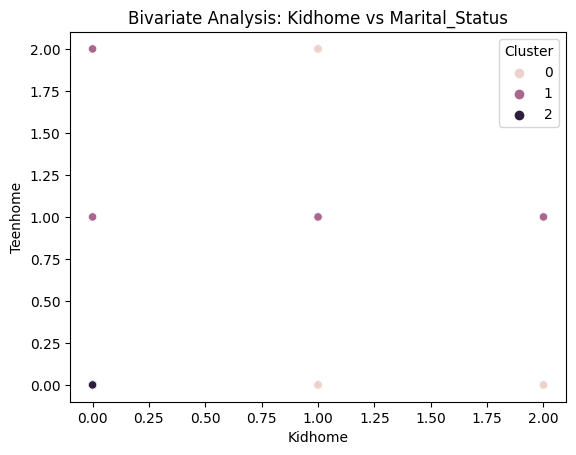

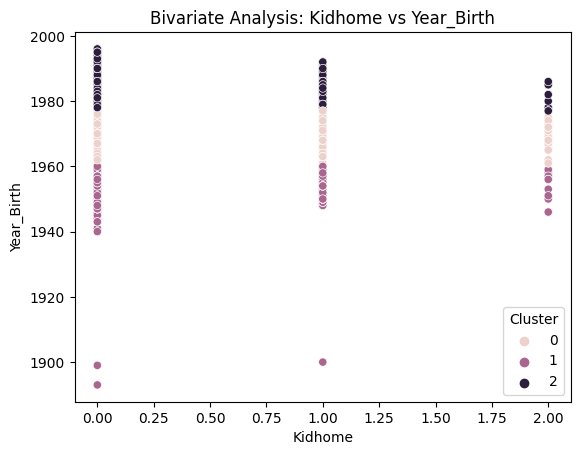

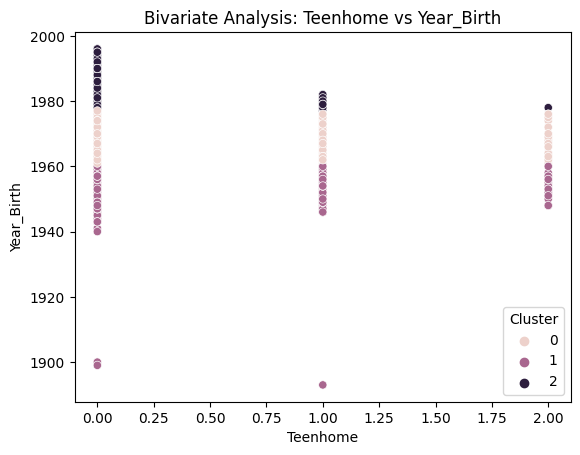

In [37]:
# Extract features for clustering
features = df[['Kidhome', 'Teenhome', 'Year_Birth']]  # Add the relevant feature columns

# Perform agglomerative clustering
clustering = AgglomerativeClustering(n_clusters=3)  # Set the desired number of clusters
cluster_labels = clustering.fit_predict(features)

# Add cluster labels to the DataFrame
df['Cluster'] = cluster_labels

# Bivariate analysis between cluster label and different features
sns.scatterplot(data=df, x='Kidhome', y='Teenhome', hue='Cluster')
plt.title('Bivariate Analysis: Kidhome vs Teenhome')
plt.show()

sns.scatterplot(data=df, x='Kidhome', y='Year_Birth', hue='Cluster')
plt.title('Bivariate Analysis: Kidhome vs Year_Birth')
plt.show()

sns.scatterplot(data=df, x='Teenhome', y='Year_Birth', hue='Cluster')
plt.title('Bivariate Analysis: Teenhome vs Year_Birth')
plt.show()

### Visualization and Interpretation of results

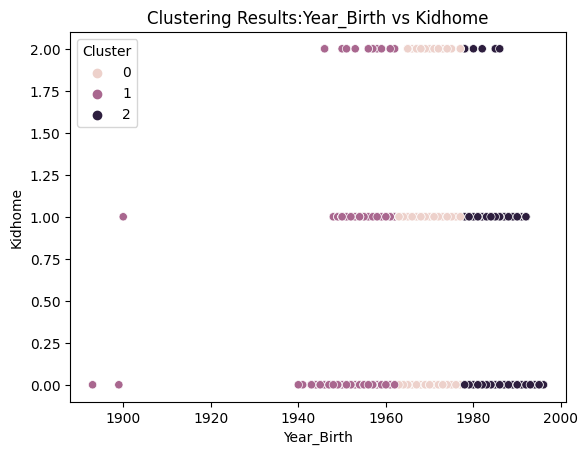

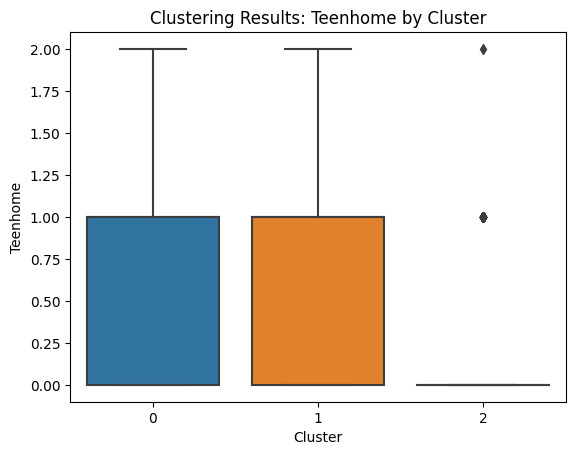

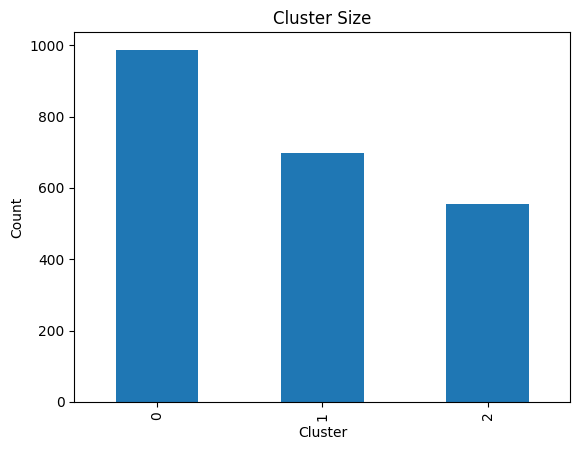

In [43]:
# Scatter plot of two features with cluster coloring
sns.scatterplot(data=df, x='Year_Birth', y='Kidhome', hue='Cluster')
plt.title('Clustering Results:Year_Birth vs Kidhome')
plt.show()

# Box plot of a feature by cluster
sns.boxplot(data=df, x='Cluster', y='Teenhome')
plt.title('Clustering Results: Teenhome by Cluster')
plt.show()

# Bar plot of cluster size
cluster_counts = df['Cluster'].value_counts().sort_index()
cluster_counts.plot(kind='bar', xlabel='Cluster', ylabel='Count', title='Cluster Size')
plt.show()

-----
## Happy Learning
-----